In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [2]:
dataset = pd.read_csv('Dataset.csv')
dataset.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [3]:
dataset.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [6]:
features_to_drop = ['Restaurant ID', 'Address', 'Locality', 'Locality Verbose',
                    'Rating color', 'Rating text', 'Currency', 'Aggregate rating']

In [7]:
reg_dataset = pd.get_dummies(dataset.drop(columns=features_to_drop))

def categorize_rating(rating):
    if rating < 3.5:
        return 0 
    elif rating <= 4.0:
        return 1  
    else:
        return 2 

reg_dataset['Rating_category'] = dataset['Aggregate rating'].apply(categorize_rating)
reg_dataset.dropna(subset=['Rating_category'], inplace=True)

In [8]:
X = reg_dataset.drop(columns=['Rating_category'])
y = reg_dataset['Rating_category']
print(X)

      Country Code   Longitude   Latitude  Average Cost for two  Price range  \
0              162  121.027535  14.565443                  1100            3   
1              162  121.014101  14.553708                  1200            3   
2              162  121.056831  14.581404                  4000            4   
3              162  121.056475  14.585318                  1500            4   
4              162  121.057508  14.584450                  1500            4   
...            ...         ...        ...                   ...          ...   
9546           208   28.977392  41.022793                    80            3   
9547           208   29.041297  41.009847                   105            3   
9548           208   29.034640  41.055817                   170            4   
9549           208   29.036019  41.057979                   120            4   
9550           208   29.026016  40.984776                    55            2   

      Votes  Restaurant Name_#45  Resta

In [9]:
print(y)

0       2
1       2
2       2
3       2
4       2
       ..
9546    2
9547    2
9548    1
9549    1
9550    1
Name: Rating_category, Length: 9551, dtype: int64


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
model.fit(X_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000, multi_class='multinomial')

In [12]:
training_data_prediction = model.predict(X_train)
print("Training Accuracy: {:.2f}%".format(metrics.accuracy_score(y_train, training_data_prediction) * 100))

Training Accuracy: 75.45%


In [13]:
testing_data_prediction = model.predict(X_test)
print("Testing Accuracy: {:.2f}%".format(metrics.accuracy_score(y_test, testing_data_prediction) * 100))

Testing Accuracy: 73.47%


In [14]:
print("\nClassification Report (Test Set):")
print(metrics.classification_report(y_test, testing_data_prediction, target_names=['Low', 'Medium', 'High']))


Classification Report (Test Set):
              precision    recall  f1-score   support

         Low       0.81      0.93      0.87      1207
      Medium       0.50      0.39      0.44       474
        High       0.59      0.40      0.48       230

    accuracy                           0.73      1911
   macro avg       0.64      0.57      0.60      1911
weighted avg       0.71      0.73      0.72      1911



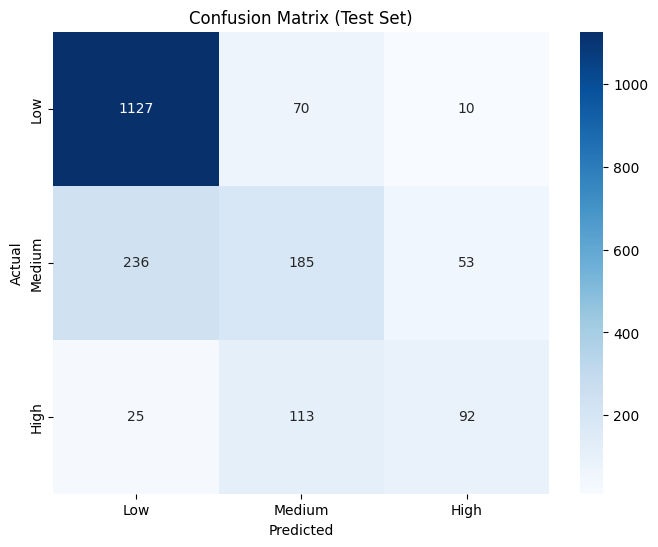

In [15]:
cm = metrics.confusion_matrix(y_test, testing_data_prediction)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Low', 'Medium', 'High'], 
            yticklabels=['Low', 'Medium', 'High'])
plt.title('Confusion Matrix (Test Set)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()